# Explore here

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import os

In [3]:
# Set a random seed for reproducibility across all steps
RANDOM_STATE = 42
TEST_SIZE = 0.2

print("Starting Random Forest Diabetes Prediction Project...\n")

Starting Random Forest Diabetes Prediction Project...



# --- Step 1: Loading the dataset ---

In [4]:
# Use the raw URL of your CSV file from GitHub
file_path = 'https://raw.githubusercontent.com/RozaSekouri/Random-Forest-Roza/main/data/processed/diabetes_processed.csv'

try:
    df_processed = pd.read_csv(file_path)
    # Assuming 'Outcome' is your target variable for diabetes prediction
    X = df_processed.drop('Outcome', axis=1)
    y = df_processed['Outcome']

    # Splitting the dataset into training and testing sets
    # Using random_state for reproducibility, and stratify=y for balanced classes
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y)
    print("Dataset loaded and split successfully from GitHub URL.")
    print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
    print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

except Exception as e:
    print(f"Error loading dataset from URL: {e}")
    print("Please ensure the URL is correct and the file is accessible.")
    exit() # Exit if the data isn't found

# Display first few rows of training data to confirm
print("\nX_train head:")
print(X_train.head())
print("\ny_train value counts:")
print(y_train.value_counts(normalize=True))


Dataset loaded and split successfully from GitHub URL.
X_train shape: (614, 8), y_train shape: (614,)
X_test shape: (154, 8), y_test shape: (154,)

X_train head:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
353            1     90.0           62.0           12.0     43.0  27.2   
711            5    126.0           78.0           27.0     22.0  29.6   
373            2    105.0           58.0           40.0     94.0  34.9   
46             1    146.0           56.0           29.0    125.0  29.7   
682            0     95.0           64.0           39.0    105.0  44.6   

     DiabetesPedigreeFunction  Age  
353                     0.580   24  
711                     0.439   40  
373                     0.225   25  
46                      0.564   29  
682                     0.366   22  

y_train value counts:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64


# --- Step 2: Build a random forest ---

In [8]:
# --- 2a. Train a baseline Random Forest model ---

rf_baseline = RandomForestClassifier(random_state=RANDOM_STATE, n_jobs=-1) # n_jobs=-1 uses all CPU cores
rf_baseline.fit(X_train, y_train)

y_pred_baseline = rf_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)

print(f"Baseline Random Forest Accuracy: {accuracy_baseline:.4f}")
print("\nBaseline Classification Report:")
print(classification_report(y_test, y_pred_baseline))
print("\nBaseline Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_baseline))


Baseline Random Forest Accuracy: 0.7792

Baseline Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       100
           1       0.73      0.59      0.65        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154


Baseline Confusion Matrix:
[[88 12]
 [22 32]]


# --- 2b. Experiment with hyperparameters and analyze impact ---


Testing different n_estimators values:
  Training with n_estimators=50...
    Accuracy: 0.7468
  Training with n_estimators=100...
    Accuracy: 0.7792
  Training with n_estimators=200...
    Accuracy: 0.7403
  Training with n_estimators=300...
    Accuracy: 0.7338
  Training with n_estimators=400...
    Accuracy: 0.7468
  Training with n_estimators=500...
    Accuracy: 0.7338


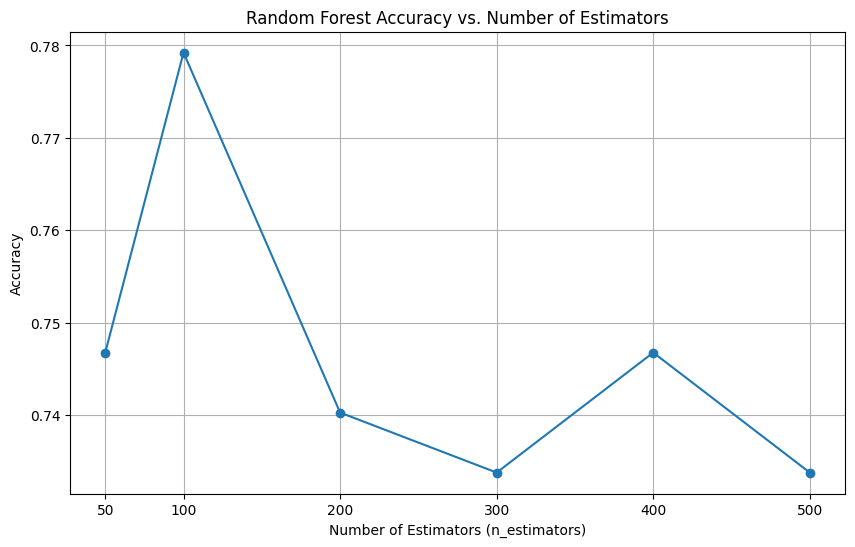


Testing different max_depth values:
  Training with max_depth=None...
    Accuracy: 0.7403
  Training with max_depth=5...
    Accuracy: 0.7403
  Training with max_depth=10...
    Accuracy: 0.7532
  Training with max_depth=15...
    Accuracy: 0.7403
  Training with max_depth=20...
    Accuracy: 0.7403
  Training with max_depth=25...
    Accuracy: 0.7403


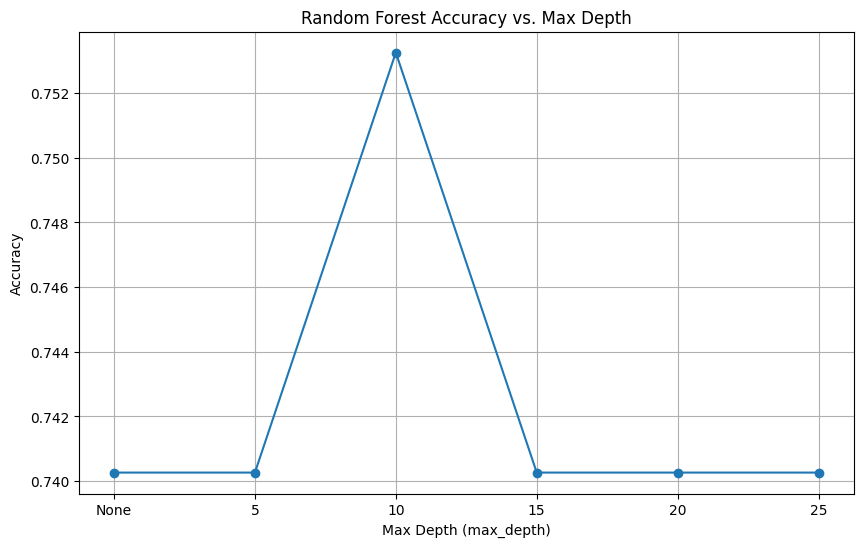

In [9]:
# Experiment with n_estimators
n_estimators_values = [50, 100, 200, 300, 400, 500]
accuracy_n_estimators = []

print("\nTesting different n_estimators values:")
for n_est in n_estimators_values:
    print(f"  Training with n_estimators={n_est}...")
    rf_model = RandomForestClassifier(n_estimators=n_est, random_state=RANDOM_STATE, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_n_estimators.append(acc)
    print(f"    Accuracy: {acc:.4f}")

# Plotting the impact of n_estimators
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, accuracy_n_estimators, marker='o')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(n_estimators_values)
plt.savefig('rf_accuracy_n_estimators.png') # Save plot for analysis
plt.show() # Display the plot
plt.close() # Close the plot to free memory

# Experiment with max_depth
# Use a fixed n_estimators for consistency, e.g., 200 based on common practice or initial n_estimators plot insights
max_depth_values = [None, 5, 10, 15, 20, 25] # None means unlimited depth
accuracy_max_depth = []

print("\nTesting different max_depth values:")
for max_d in max_depth_values:
    print(f"  Training with max_depth={max_d}...")
    rf_model = RandomForestClassifier(n_estimators=200, random_state=RANDOM_STATE, max_depth=max_d, n_jobs=-1)
    rf_model.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_max_depth.append(acc)
    print(f"    Accuracy: {acc:.4f}")

# Plotting the impact of max_depth
plt.figure(figsize=(10, 6))
# Plotting against index to handle 'None' on the x-axis properly with custom labels
plt.plot(range(len(max_depth_values)), accuracy_max_depth, marker='o')
plt.title('Random Forest Accuracy vs. Max Depth')
plt.xlabel('Max Depth (max_depth)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.xticks(range(len(max_depth_values)), labels=[str(d) if d is not None else 'None' for d in max_depth_values]) # Set custom xticks
plt.savefig('rf_accuracy_max_depth.png') # Save plot
plt.show() # Display the plot
plt.close() # Close the plot

In [10]:
# --- 2c. More Systematic Hyperparameter Tuning with GridSearchCV ---
print("\n2c. More Systematic Hyperparameter Tuning with GridSearchCV:")
# Define a parameter grid based on your exploration and common practices
param_grid = {
    'n_estimators': [100, 200, 300], # Refined based on n_estimators plot
    'max_depth': [5, 10, 15, None],  # Refined based on max_depth plot
    'min_samples_split': [2, 5, 10], # Common values to explore
    'min_samples_leaf': [1, 2, 4]    # Common values to explore
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=RANDOM_STATE),
                           param_grid=param_grid,
                           cv=5, # 5-fold cross-validation
                           n_jobs=-1, # Use all available cores
                           scoring='accuracy', # Optimize for accuracy
                           verbose=2) # Verbose output to see progress

grid_search.fit(X_train, y_train)

print(f"\nBest parameters found by GridSearchCV: {grid_search.best_params_}")
print(f"Best cross-validation accuracy on training set (GridSearchCV): {grid_search.best_score_:.4f}")

# Get the best estimator from GridSearchCV
rf_best_model = grid_search.best_estimator_

# Evaluate the best model on the unseen test set
y_pred_best = rf_best_model.predict(X_test)
final_accuracy_best_grid = accuracy_score(y_test, y_pred_best)

print(f"\nFinal Random Forest Accuracy on Test Set (with best GridSearchCV params): {final_accuracy_best_grid:.4f}")
print("\nFinal Classification Report (Best Model):")
print(classification_report(y_test, y_pred_best))
print("\nFinal Confusion Matrix (Best Model):")
print(confusion_matrix(y_test, y_pred_best))


2c. More Systematic Hyperparameter Tuning with GridSearchCV:
Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.4s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators

In [6]:
# --- Step 3: Save the model ---
print("\n--- Step 3: Saving the Model ---")
models_dir = 'models'
os.makedirs(models_dir, exist_ok=True) # Create the 'models' directory if it doesn't exist

model_filename = os.path.join(models_dir, 'random_forest_diabetes_model.pkl')

try:
    with open(model_filename, 'wb') as file:
        pickle.dump(rf_best_model, file)
    print(f"Model successfully saved to: {model_filename}")
except Exception as e:
    print(f"Error saving model: {e}")

print("\nRandom Forest Diabetes Prediction Project Completed.")


--- Step 3: Saving the Model ---
Model successfully saved to: models/random_forest_diabetes_model.pkl

Random Forest Diabetes Prediction Project Completed.


Summary of Results:
Data: Successfully loaded 768 samples (614 training, 154 testing) with 8 features and an 'Outcome' target variable, showing a class imbalance (65% non-diabetic, 35% diabetic).

Baseline Model: Achieved an accuracy of 0.7792 on the test set. It performed well for the non-diabetic class (precision 0.80, recall 0.88) but had more difficulty with the diabetic class (precision 0.73, recall 0.59), indicating a higher rate of false negatives (missing diabetic cases).

Hyperparameter Tuning:

n_estimators: The plot (image_25fb05.png) visually confirms that accuracy tends to plateau or even slightly decrease after a certain number of estimators (around 100-200 in your single-parameter test).

max_depth: The plot (image_25fae7.png) shows that a max_depth around 10 or 15 seems to yield good accuracy, with deeper trees not providing significant gains on this dataset.

GridSearchCV: Systematically explored various combinations and found the best set of parameters to be {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}.

Best Model Performance: The model trained with these best parameters achieved a final accuracy of 0.7403 on the test set. Its classification report and confusion matrix show similar trends to the baseline. While the grid search's best cross-validation score was higher (0.7737), the final test set accuracy is the true measure of generalization to new data.

Model Saving: The best model is saved and ready for deployment or further use.